### Modelos Pré-Treinados

#### O que são modelos pré-treinados?

Modelos pré-treinados são redes neurais que já foram treinadas em grandes conjuntos de dados, como ImageNet, para resolver tarefas gerais, como classificação de imagens. Esses modelos capturam representações úteis dos dados, como características de baixo nível (bordas, texturas) e de alto nível (formas complexas e objetos inteiros). Por isso, podem ser utilizados como ponto de partida para resolver problemas específicos sem a necessidade de treinar uma rede do zero, economizando tempo e recursos computacionais.

#### Vantagens do Uso de Modelos Pré-Treinados
- **Redução de custos:** O treinamento de grandes redes neurais do zero requer recursos computacionais significativos e tempo.
- **Generalização:** Modelos pré-treinados frequentemente generalizam melhor para novas tarefas devido à riqueza de seus dados de treinamento.
- **Transfer Learning:** Ajustar um modelo pré-treinado para uma tarefa específica é simples. Isso pode ser feito ao congelar camadas inferiores e treinar apenas as camadas superiores para o novo domínio.

#### Como utilizá-los?
Os modelos pré-treinados geralmente vêm acompanhados de pesos otimizados para tarefas específicas e métodos para pré-processar os dados de entrada. Em bibliotecas como o PyTorch, essas funcionalidades estão disponíveis de forma acessível.

#### Hubs de Modelos Pré-Treinados
Existem hubs especializados para encontrar e utilizar modelos pré-treinados. Um dos mais conhecidos é o **torchvision**, que oferece uma variedade de modelos treinados no ImageNet e outras tarefas relacionadas a visão computacional. Para acessar os modelos disponíveis e sua documentação, você pode visitar o [hub oficial do torchvision](https://pytorch.org/vision/main/models.html).

In [1]:
import torch
import requests
import numpy as np
from PIL import Image
from torchvision import models
import matplotlib.pyplot as plt

In [2]:
# Importa os pesos pré-treinados do modelo ResNet50 da biblioteca torchvision
weights = models.ResNet50_Weights.IMAGENET1K_V1
# Instancia o modelo ResNet50 com os pesos pré-treinados no ImageNet
model = models.resnet50(weights=weights)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 84.3MB/s]


In [3]:
# Função para carregar uma imagem a partir de uma URL
def load_image_from_url(url):
    response = requests.get(url)  # Faz uma requisição HTTP para obter a imagem
    img = Image.open(requests.get(url, stream=True).raw)  # Abre a imagem diretamente do stream
    return img  # Retorna a imagem carregada

# Função para plotar a imagem carregada
def plot_image(img):
    img = np.array(img)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Função para obter as 5 principais previsões do modelo
def get_top5_predictions(model, img, weights=weights):
    # Inferência
    model.eval()
    with torch.no_grad():
        output = model(img)

    # Converte logits em probabilidades
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Obtém as 5 maiores probabilidades e seus índices
    top5_prob, top5_catid = torch.topk(probabilities, 5)

    # Obtém as categorias associadas ao conjunto de pesos
    categories = weights.meta["categories"]

    # Cria uma lista das 5 principais categorias com suas respectivas probabilidades
    top5 = [(categories[catid], prob.item()) for catid, prob in zip(top5_catid, top5_prob)]
    return top5

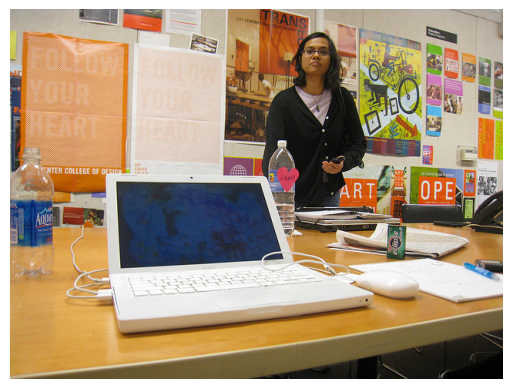

notebook: 0.48580
laptop: 0.28305
desk: 0.14963
mouse: 0.01761
web site: 0.01397



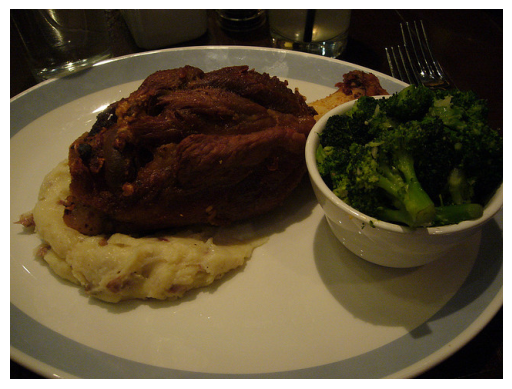

mashed potato: 0.76058
meat loaf: 0.13337
broccoli: 0.07410
plate: 0.01668
guacamole: 0.00580



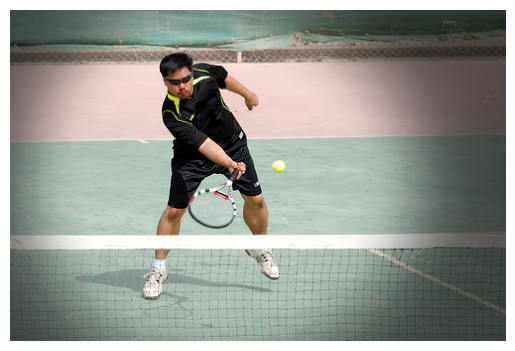

racket: 0.75530
tennis ball: 0.24442
ping-pong ball: 0.00028
volleyball: 0.00000
soccer ball: 0.00000



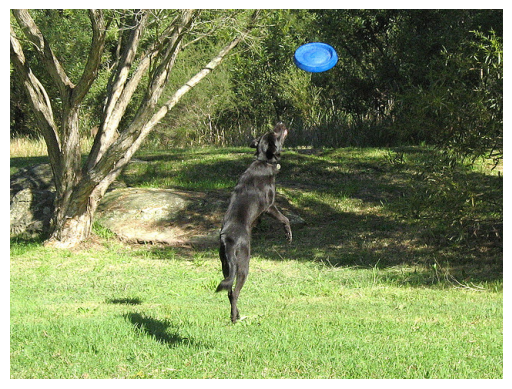

Scottish deerhound: 0.14249
Irish wolfhound: 0.13751
wallaby: 0.09503
miniature schnauzer: 0.07523
groenendael: 0.06264



In [4]:
# Lista de URLs de imagens para teste
urls = [
    "http://images.cocodataset.org/test-stuff2017/000000024309.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000028117.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000006149.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000004954.jpg",
]

# Obtém a transformação recomendada para pré-processar as imagens
# A transformação é configurada automaticamente para o conjunto de pesos utilizados
preprocess = weights.transforms()

# Para cada URL...
for url in urls:
    # Carrega a imagem da URL fornecida
    image = load_image_from_url(url)

    # Mostra a imagem carregada em um gráfico
    plot_image(image)

    # Pré-processa a imagem para que tenha o formato esperado pelo modelo
    image = preprocess(image).unsqueeze(0)

    # Obtém as 5 principais previsões do modelo para a imagem processada
    predictions = get_top5_predictions(model, image)

    for cat, prob in predictions:
        print(f"{cat}: {prob:.5f}")
    print()

## Exercícios

### Exercício 1.1
Compare os resultados obtidos com o conjunto de pesos `IMAGENET1K_V2`.

In [ ]:
# Importa os pesos pré-treinados do modelo ResNet50 da biblioteca torchvision
weights = models.ResNet50_Weights.IMAGENET1K_V2
# Instancia o modelo ResNet50 com os pesos pré-treinados no ImageNet
model = models.resnet50(weights=weights)

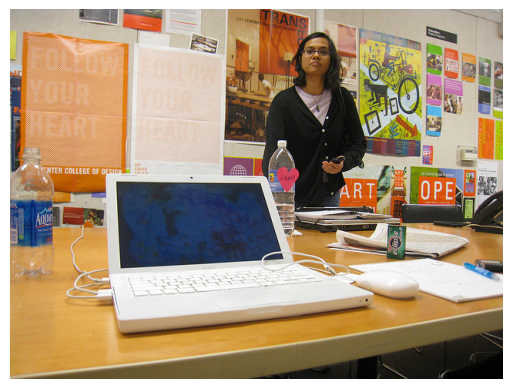

desk: 0.15687
laptop: 0.07455
mouse: 0.06051
notebook: 0.04243
monitor: 0.02287



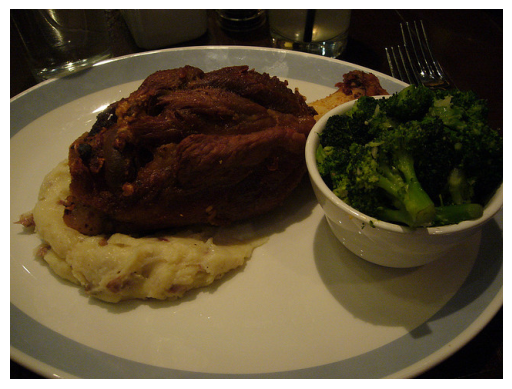

mashed potato: 0.36980
meat loaf: 0.06883
plate: 0.04797
broccoli: 0.03864
ice cream: 0.00470



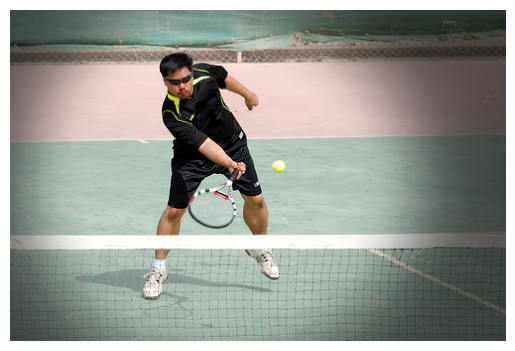

racket: 0.29871
tennis ball: 0.11111
ping-pong ball: 0.00831
scuba diver: 0.00392
dugong: 0.00382



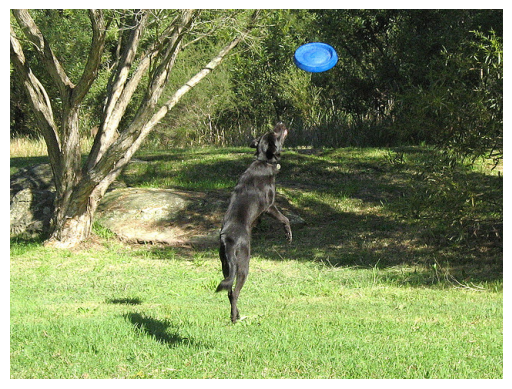

malinois: 0.12319
American Staffordshire terrier: 0.04077
Great Dane: 0.03672
French bulldog: 0.03305
kelpie: 0.02595



In [ ]:
# Lista de URLs de imagens para teste
urls = [
    "http://images.cocodataset.org/test-stuff2017/000000024309.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000028117.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000006149.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000004954.jpg",
]

# Obtém a transformação recomendada para pré-processar as imagens
# A transformação é configurada automaticamente para o conjunto de pesos utilizados
preprocess = weights.transforms()

# Para cada URL...
for url in urls:
    # Carrega a imagem da URL fornecida
    image = load_image_from_url(url)

    # Mostra a imagem carregada em um gráfico
    plot_image(image)

    # Pré-processa a imagem para que tenha o formato esperado pelo modelo
    image = preprocess(image).unsqueeze(0)

    # Obtém as 5 principais previsões do modelo para a imagem processada
    predictions = get_top5_predictions(model, image)

    for cat, prob in predictions:
        print(f"{cat}: {prob:.5f}")
    print()

### Exercício 1.2
Compare os resultados obtidos com o conjunto de pesos `None`.

In [5]:
# Importa os pesos pré-treinados do modelo ResNet50 da biblioteca torchvision
#weights = models.ResNet50_Weights.IMAGENET1K_V2

# Instancia o modelo ResNet50 sem os pesos pré-treinados no ImageNet
model = models.resnet50(weights=None)

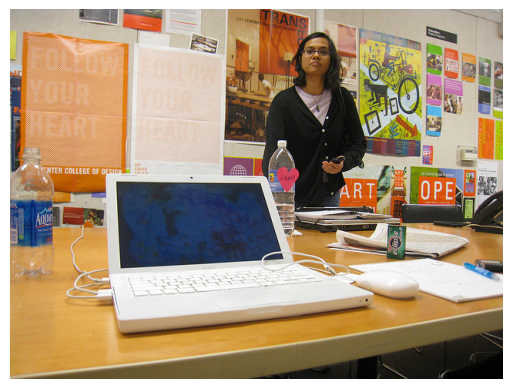

koala: 0.61130
schooner: 0.36989
maraca: 0.01359
CD player: 0.00260
Weimaraner: 0.00217



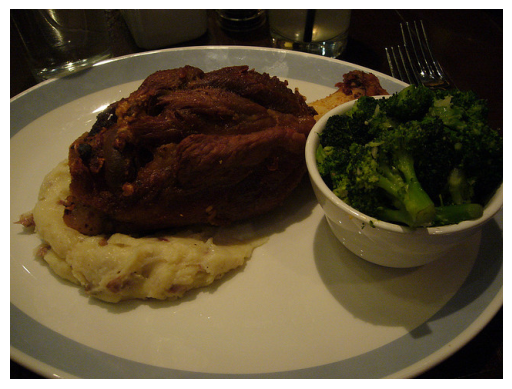

koala: 0.61418
schooner: 0.29892
maraca: 0.07255
Weimaraner: 0.00518
CD player: 0.00350



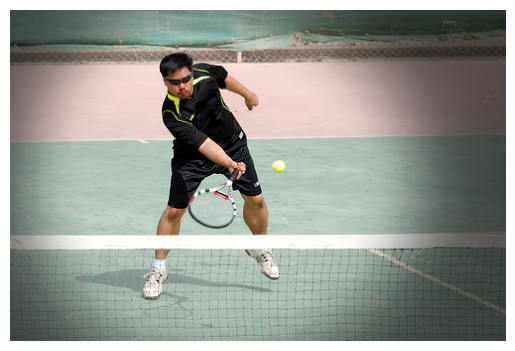

koala: 0.53833
schooner: 0.44124
maraca: 0.01593
CD player: 0.00179
sorrel: 0.00177



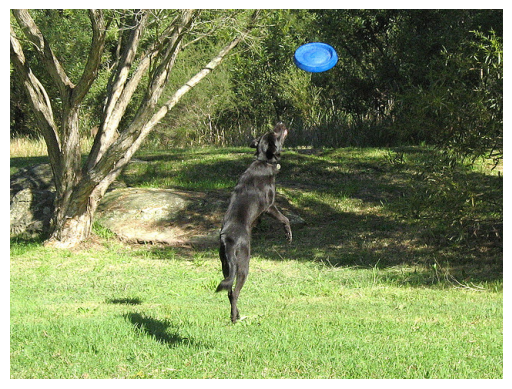

schooner: 0.63177
koala: 0.31138
maraca: 0.04450
CD player: 0.00834
Weimaraner: 0.00312



In [6]:
# Lista de URLs de imagens para teste
urls = [
    "http://images.cocodataset.org/test-stuff2017/000000024309.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000028117.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000006149.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000004954.jpg",
]

# Obtém a transformação recomendada para pré-processar as imagens
# A transformação é configurada automaticamente para o conjunto de pesos utilizados
preprocess = weights.transforms()

# Para cada URL...
for url in urls:
    # Carrega a imagem da URL fornecida
    image = load_image_from_url(url)

    # Mostra a imagem carregada em um gráfico
    plot_image(image)

    # Pré-processa a imagem para que tenha o formato esperado pelo modelo
    image = preprocess(image).unsqueeze(0)

    # Obtém as 5 principais previsões do modelo para a imagem processada
    predictions = get_top5_predictions(model, image)

    for cat, prob in predictions:
        print(f"{cat}: {prob:.5f}")
    print()

### Exercício 2
Compare os resultados obtidos com o modelo VGG16.

In [7]:
# Importa os pesos pré-treinados do modelo VGG16 da biblioteca torchvision
weights = models.VGG16_Weights.IMAGENET1K_V1
# Instancia o modelo ResNet50 com os pesos pré-treinados no ImageNet
model = models.vgg16(weights=weights)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 59.2MB/s]


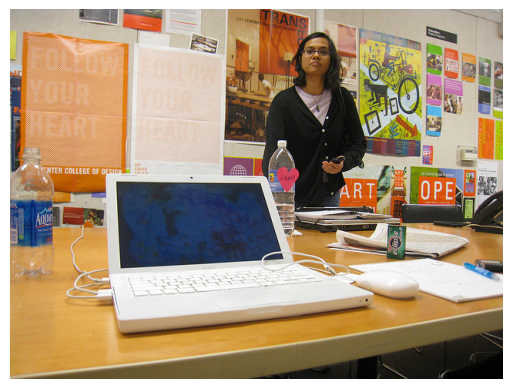

notebook: 0.31110
laptop: 0.26903
desk: 0.12034
monitor: 0.04786
mouse: 0.03980



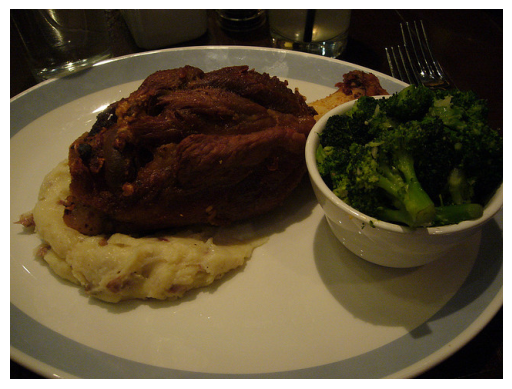

mashed potato: 0.65291
meat loaf: 0.23871
broccoli: 0.04232
plate: 0.02975
guacamole: 0.01925



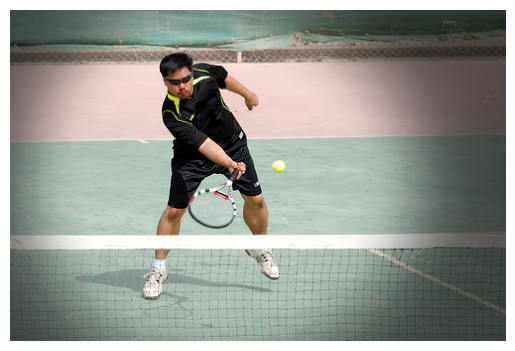

racket: 0.98071
tennis ball: 0.01606
ping-pong ball: 0.00298
unicycle: 0.00010
volleyball: 0.00006



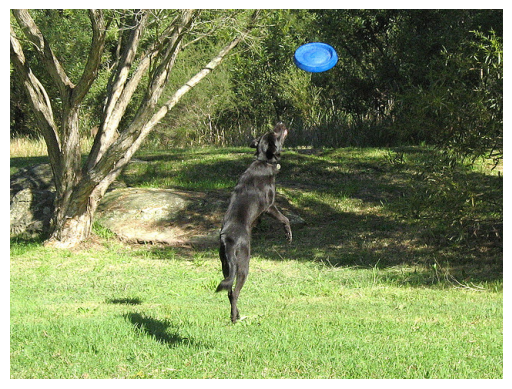

kelpie: 0.18719
Labrador retriever: 0.13444
Staffordshire bullterrier: 0.09817
German shepherd: 0.09047
flat-coated retriever: 0.07023



In [8]:
# Lista de URLs de imagens para teste
urls = [
    "http://images.cocodataset.org/test-stuff2017/000000024309.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000028117.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000006149.jpg",
    "http://images.cocodataset.org/test-stuff2017/000000004954.jpg",
]

# Obtém a transformação recomendada para pré-processar as imagens
# A transformação é configurada automaticamente para o conjunto de pesos utilizados
preprocess = weights.transforms()

# Para cada URL...
for url in urls:
    # Carrega a imagem da URL fornecida
    image = load_image_from_url(url)

    # Mostra a imagem carregada em um gráfico
    plot_image(image)

    # Pré-processa a imagem para que tenha o formato esperado pelo modelo
    image = preprocess(image).unsqueeze(0)

    # Obtém as 5 principais previsões do modelo para a imagem processada
    predictions = get_top5_predictions(model, image)

    for cat, prob in predictions:
        print(f"{cat}: {prob:.5f}")
    print()